## Pra-pemrosesan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\t')
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


## Explorasi Data

In [ ]:
data = data.rename(columns = {
    'EventName' : 'event_name',
    'DeviceIDHash' : 'device_id_hash',
    'EventTimestamp' : 'event_timestamp',
    'ExpId' : 'exp_id'
})
data.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [ ]:
data['event_timestamp'] = data['event_timestamp'].apply(pd.Timestamp, unit = 's')
data.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [ ]:
data['device_id_hash'] = data['device_id_hash'].astype(str)
data.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  object        
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   exp_id           244126 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.5+ MB


In [ ]:
data['date'] = data['event_timestamp'].dt.date
data.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Data di simpan sebagai `data` dengan kolom sebagai berikut :
- event_name
- device_id_hash
- event_timestamp
- exp_id
- date

## Analisis Statistik

### Event

In [ ]:
event_count = data.groupby('event_name').agg({
    'device_id_hash' : 'count'
}).reset_index().rename(columns = {
    'device_id_hash' : 'event_count'
}). sort_values(by = 'event_count', ascending = False)
event_count

,event_name,event_count
1,MainScreenAppear,119205
2,OffersScreenAppear,46825
0,CartScreenAppear,42731
3,PaymentScreenSuccessful,34313
4,Tutorial,1052


In [ ]:
event_count['%'] = (event_count['event_count']/event_count['event_count'].sum())*100
event_count

,event_name,event_count,%
1,MainScreenAppear,119205,48.829293
2,OffersScreenAppear,46825,19.180669
0,CartScreenAppear,42731,17.503666
3,PaymentScreenSuccessful,34313,14.055447
4,Tutorial,1052,0.430925


<BarContainer object of 5 artists>

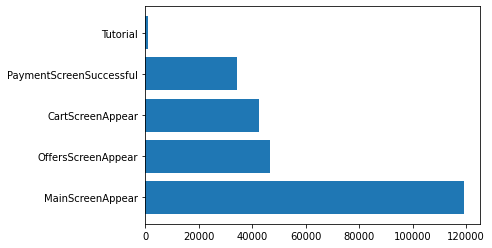

In [ ]:
plt.barh(event_count['event_name'], event_count['event_count'])

Terdapat 5 tipe `event_name` dengan hasil sebagai berikut :
- `MainScreenAppear` dengan hasil sebanyak 119205 atau sebesar 48.8%
- `OffersScreenAppear` dengan hasil sebanyak 46825 atau sebesar 19.1%
- `CartScreenAppear` dengan hasil sebanyak 42731 atau sebesar 17.5%
- `PaymentScreenSuccessful` dengan hasil sebanyak 34313 atau sebesar 14%
- `Tutorial` dengan hasil sebanyak 1052 atau sebesar 0.4%

### Users

In [ ]:
user_count = data.groupby(['device_id_hash']).agg({
    'device_id_hash' : 'count'
})
user_count

,device_id_hash
device_id_hash,
1000608915523616548,3
100724994572555335,2
1008242126838007188,24
1009503747199967885,37
1009745980451513098,31
...,...
992321565231279868,7
993193057518949787,5
995065401066914588,3


In [ ]:
user_count['count'] = 1
user_count['cum_count'] = user_count['count'].cumsum()
user_count

,device_id_hash,count,cum_count
device_id_hash,,,
1000608915523616548,3,1,1
100724994572555335,2,1,2
1008242126838007188,24,1,3
1009503747199967885,37,1,4
1009745980451513098,31,1,5
...,...,...,...
992321565231279868,7,1,7547
993193057518949787,5,1,7548
995065401066914588,3,1,7549


<AxesSubplot:xlabel='device_id_hash', ylabel='cum_count'>

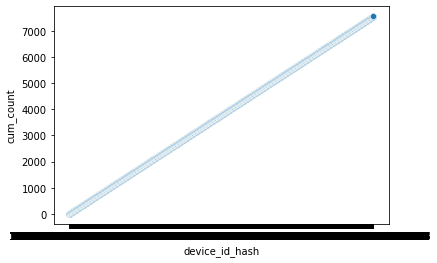

In [ ]:
sns.scatterplot(data = user_count['cum_count'] )

Terdapat `7551` user yang terdaftar pada log.

### Jumlah event per User

In [ ]:
user_event = data.groupby(['device_id_hash']).agg({
    'event_name' : 'count'
}).reset_index()
user_event.sample(10)

,device_id_hash,event_name
5049,6643680603366504136,33
371,1446068587914200066,65
4887,6463758395690245711,7
1534,2754977819347976900,79
1399,2607978222931533150,21
1199,2384589459867179844,14
6572,8247594206740129954,63
1688,2928246415014807834,8
3903,5365227480683749189,2
4617,6153379606332829997,7


In [ ]:
user_event['user'] = 1
user_event['user_cum'] = user_event['user'].cumsum()
user_event.head()

,device_id_hash,event_name,user,user_cum
0,1000608915523616548,3,1,1
1,100724994572555335,2,1,2
2,1008242126838007188,24,1,3
3,1009503747199967885,37,1,4
4,1009745980451513098,31,1,5


In [ ]:
user_event['event_cum'] = user_event['event_name'].cumsum()
user_event.head()

,device_id_hash,event_name,user,user_cum,event_cum
0,1000608915523616548,3,1,1,3
1,100724994572555335,2,1,2,5
2,1008242126838007188,24,1,3,29
3,1009503747199967885,37,1,4,66
4,1009745980451513098,31,1,5,97


In [ ]:
user_event['avg_cum'] = user_event['event_cum'] / user_event['user_cum']
user_event.tail()

,device_id_hash,event_name,user,user_cum,event_cum,avg_cum
7546,992321565231279868,7,1,7547,244095,32.343315
7547,993193057518949787,5,1,7548,244100,32.339693
7548,995065401066914588,3,1,7549,244103,32.335806
7549,997141886226099626,13,1,7550,244116,32.333245
7550,997959739029313547,10,1,7551,244126,32.330287


<AxesSubplot:xlabel='avg_cum', ylabel='user_cum'>

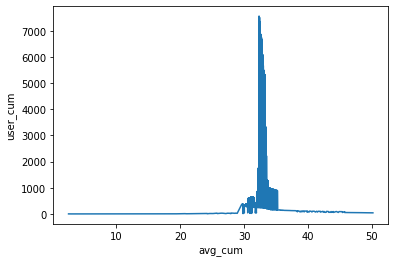

In [ ]:
sns.lineplot(data = user_event, x = 'avg_cum', y = 'user_cum' )

In [ ]:
user_event.describe()

,event_name,user,user_cum,event_cum,avg_cum
count,7551.000000,7551.0,7551.000000,7551.000000,7551.000000
mean,32.330287,1.0,3776.000000,123798.588929,32.849568
std,65.312344,0.0,2179.930274,71092.305306,1.470482
min,1.000000,1.0,1.000000,3.000000,2.500000
25%,9.000000,1.0,1888.500000,61755.000000,32.571902
50%,20.000000,1.0,3776.000000,125459.000000,32.795859
75%,37.500000,1.0,5663.500000,186902.000000,33.076555
max,2308.000000,1.0,7551.000000,244126.000000,50.166667


Dengan nilai event rata rata per user sebesar `32.33`

### Periode Data

In [ ]:
data.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [ ]:
min_date = data['date'].min()
max_date = data['date'].max()
min_date, max_date

(datetime.date(2019, 7, 25), datetime.date(2019, 8, 7))

<AxesSubplot:xlabel='Count', ylabel='event_timestamp'>

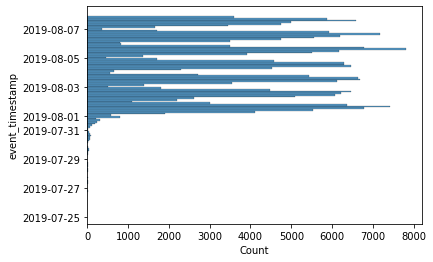

In [ ]:
sns.histplot(data = data, y ='event_timestamp')

In [ ]:
new_data = data[data['event_timestamp'] >= '2019-08-01']
new_data.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


<AxesSubplot:xlabel='Count', ylabel='event_timestamp'>

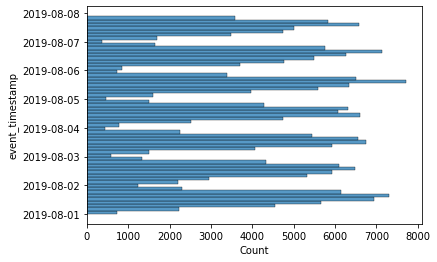

In [ ]:
sns.histplot(data = new_data, y ='event_timestamp')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       241298 non-null  object        
 1   device_id_hash   241298 non-null  object        
 2   event_timestamp  241298 non-null  datetime64[ns]
 3   exp_id           241298 non-null  int64         
 4   date             241298 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 11.0+ MB


Data yang digunakan merupakan data setelah tanggal `2019-08-01` dengan data sebanyak `241298`.

### Data Baru

- Apakah kamu kehilangan banyak peristiwa dan pengguna saat menyingkirkan data lama?

In [ ]:
event_count_new = new_data.groupby('event_name').agg({
    'device_id_hash' : 'count'
}).reset_index().rename(columns = {
    'device_id_hash' : 'event_count'
})
event_count_new

,event_name,event_count
0,CartScreenAppear,42365
1,MainScreenAppear,117431
2,OffersScreenAppear,46350
3,PaymentScreenSuccessful,34113
4,Tutorial,1039


In [ ]:
count_merged = event_count_new.merge(event_count, on = 'event_name').rename(columns = {
    'event_count_x' : 'new',
    'event_count_y' : 'old'
})
count_merged

,event_name,new,old,%
0,CartScreenAppear,42365,42731,17.503666
1,MainScreenAppear,117431,119205,48.829293
2,OffersScreenAppear,46350,46825,19.180669
3,PaymentScreenSuccessful,34113,34313,14.055447
4,Tutorial,1039,1052,0.430925


In [ ]:
count_merged['%'] = (count_merged['new']/count_merged['old'])*100
count_merged['diff'] = count_merged['%']-100
count_merged

,event_name,new,old,%,diff
0,CartScreenAppear,42365,42731,99.143479,-0.856521
1,MainScreenAppear,117431,119205,98.511807,-1.488193
2,OffersScreenAppear,46350,46825,98.985585,-1.014415
3,PaymentScreenSuccessful,34113,34313,99.417131,-0.582869
4,Tutorial,1039,1052,98.764259,-1.235741


<BarContainer object of 5 artists>

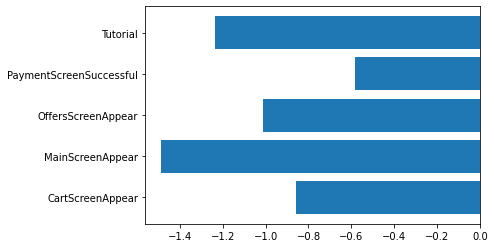

In [ ]:
plt.barh(count_merged['event_name'], count_merged['diff'])

In [ ]:
count_merged.describe()

,new,old,%,diff
count,5.000000,5.000000,5.000000,5.000000
mean,48259.600000,48825.200000,98.964452,-1.035548
std,42582.234603,43264.705329,0.347268,0.347268
min,1039.000000,1052.000000,98.511807,-1.488193
25%,34113.000000,34313.000000,98.764259,-1.235741
50%,42365.000000,42731.000000,98.985585,-1.014415
75%,46350.000000,46825.000000,99.143479,-0.856521
max,117431.000000,119205.000000,99.417131,-0.582869


Berikut perbandingan dari data lama dan data baru :
- Penurunan terbanyak terjadi pada `MainScreenAppear` sebesar `-1.48`
- Penurunan terendah terjadi pada `PaymentScreenSuccessful` sebesar `-0.58`
- Rata rata penurunan sebesar `-1.03`

### User Kelompok

In [ ]:
user_group = new_data.groupby('exp_id').agg({
    'device_id_hash' : 'count'
}).reset_index()
user_group

,exp_id,device_id_hash
0,246,79425
1,247,77147
2,248,84726


<BarContainer object of 3 artists>

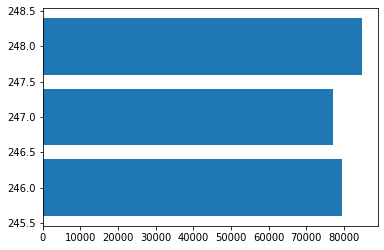

In [ ]:
plt.barh(user_group['exp_id'], user_group['device_id_hash'])

Berikut nilai dari `exp_id` dari user pada data baru :
- `246` dengan hasil sebesar `79425`.
- `247` dengan hasil sebesar `77147`.
- `248` dengan hasil sebesar `84726`.

## Analisis Bisnin

### Frekuensi Event

In [ ]:
by_eve = new_data.groupby('event_name').agg({
    'device_id_hash' : 'count'
}).reset_index().sort_values(by = 'device_id_hash', ascending = False)
by_eve

,event_name,device_id_hash
1,MainScreenAppear,117431
2,OffersScreenAppear,46350
0,CartScreenAppear,42365
3,PaymentScreenSuccessful,34113
4,Tutorial,1039


<BarContainer object of 5 artists>

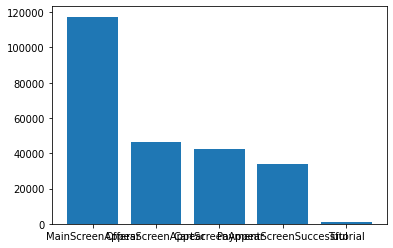

In [ ]:
plt.bar(by_eve['event_name'], by_eve['device_id_hash'])

Berikut hasil dari penelitian mengenai `Frekuensi Event` :
- `MainScreenAppear` dengan interaksi sebanyak `117431`.
- `OffersScreenAppear` dengan interaksi sebanyak `46350`.
- `CartScreenAppear` dengan interaksi sebanyak `42365`.
- `PaymentScreenSuccessful` dengan interaksi sebanyak `34113`.
- `Tutorial` dengan interaksi sebanyak `1039`.

### User and Event

In [ ]:
all_event = new_data.pivot_table(index = 'device_id_hash', columns = 'event_name', values = 'exp_id', aggfunc = 'count')
all_event.head()

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
1000608915523616548,NaN,2.0,1.0,NaN,NaN
100724994572555335,NaN,2.0,NaN,NaN,NaN
1008242126838007188,6.0,8.0,4.0,6.0,NaN
1009503747199967885,3.0,8.0,23.0,3.0,NaN
1009745980451513098,10.0,9.0,5.0,7.0,NaN


In [ ]:
all_eve_user = all_event[(all_event['CartScreenAppear'].notna())
          & (all_event['MainScreenAppear'].notna())
          & (all_event['OffersScreenAppear'].notna())
          & (all_event['PaymentScreenSuccessful'].notna())
          & (all_event['Tutorial'].notna())]
all_eve_user.head()

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
1025423183050919111,2.0,3.0,9.0,2.0,1.0
1052317782824159991,17.0,31.0,40.0,9.0,1.0
1064069332576331836,7.0,15.0,20.0,3.0,1.0
1113177574547813281,4.0,8.0,8.0,1.0,1.0
1158644344098364192,11.0,46.0,28.0,8.0,1.0


In [ ]:
all_eve_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 1025423183050919111 to 98792428456080413
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CartScreenAppear         466 non-null    float64
 1   MainScreenAppear         466 non-null    float64
 2   OffersScreenAppear       466 non-null    float64
 3   PaymentScreenSuccessful  466 non-null    float64
 4   Tutorial                 466 non-null    float64
dtypes: float64(5)
memory usage: 21.8+ KB


In [ ]:
temp_list = [['CartScreenAppear', all_eve_user['CartScreenAppear'].sum()],
             ['MainScreenAppear', all_eve_user['MainScreenAppear'].sum()],
             ['OffersScreenAppear', all_eve_user['OffersScreenAppear'].sum()],
             ['PaymentScreenSuccessful', all_eve_user['PaymentScreenSuccessful'].sum()],
             ['Tutorial', all_eve_user['Tutorial'].sum()]]
list_df = pd.DataFrame(temp_list, columns=['event_name', 'sum']).sort_values(by = 'sum', ascending = False)
list_df.head()

,event_name,sum
2,OffersScreenAppear,7468.0
1,MainScreenAppear,7428.0
0,CartScreenAppear,6431.0
3,PaymentScreenSuccessful,4349.0
4,Tutorial,542.0


<BarContainer object of 5 artists>

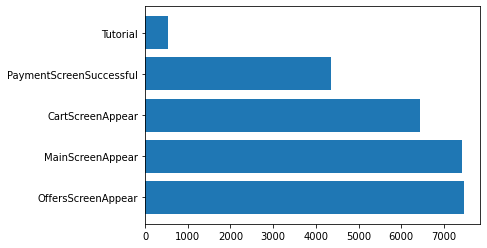

In [ ]:
plt.barh(list_df['event_name'],list_df['sum'])

In [ ]:
once_user = all_eve_user[(all_eve_user['CartScreenAppear'] == 1.0 )
          | (all_eve_user['MainScreenAppear'] == 1.0 )
          | (all_eve_user['OffersScreenAppear'] == 1 )
          | (all_eve_user['PaymentScreenSuccessful'] == 1 )
          | (all_eve_user['Tutorial'] == 1 )]
once_user.head()

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
1025423183050919111,2.0,3.0,9.0,2.0,1.0
1052317782824159991,17.0,31.0,40.0,9.0,1.0
1064069332576331836,7.0,15.0,20.0,3.0,1.0
1113177574547813281,4.0,8.0,8.0,1.0,1.0
1158644344098364192,11.0,46.0,28.0,8.0,1.0


In [ ]:
once_cart = once_user['CartScreenAppear'][once_user['CartScreenAppear'] == 1].sum()
once_main = once_user['MainScreenAppear'][once_user['MainScreenAppear'] == 1].sum()
once_offer = once_user['OffersScreenAppear'][once_user['OffersScreenAppear'] == 1].sum()
once_pay = once_user['PaymentScreenSuccessful'][once_user['PaymentScreenSuccessful'] == 1].sum()
once_tut = once_user['Tutorial'][once_user['Tutorial'] == 1].sum()

In [ ]:
temp_once = [['CartScreenAppear', once_cart],
             ['MainScreenAppear', once_main],
             ['OffersScreenAppear', once_offer],
             ['PaymentScreenSuccessful', once_pay],
             ['Tutorial', once_tut]]
once_df = pd.DataFrame(temp_once, columns=['event_name', 'sum']).sort_values(by = 'sum', ascending = False)
once_df.head()

,event_name,sum
4,Tutorial,418.0
3,PaymentScreenSuccessful,105.0
0,CartScreenAppear,43.0
1,MainScreenAppear,6.0
2,OffersScreenAppear,2.0


In [ ]:
merge_df = list_df.merge(once_df, on = 'event_name').rename(columns = {
    'sum_x' : 'total',
    'sum_y' : 'once'
})
merge_df

,event_name,total,once
0,OffersScreenAppear,7468.0,2.0
1,MainScreenAppear,7428.0,6.0
2,CartScreenAppear,6431.0,43.0
3,PaymentScreenSuccessful,4349.0,105.0
4,Tutorial,542.0,418.0


In [ ]:
merge_df['diff'] = merge_df['total'] - merge_df['once']
merge_df

,event_name,total,once,diff
0,OffersScreenAppear,7468.0,2.0,7466.0
1,MainScreenAppear,7428.0,6.0,7422.0
2,CartScreenAppear,6431.0,43.0,6388.0
3,PaymentScreenSuccessful,4349.0,105.0,4244.0
4,Tutorial,542.0,418.0,124.0


In [ ]:
merge_df = merge_df.set_index('event_name')
merge_df

,total,once,diff
event_name,,,
OffersScreenAppear,7468.0,2.0,7466.0
MainScreenAppear,7428.0,6.0,7422.0
CartScreenAppear,6431.0,43.0,6388.0
PaymentScreenSuccessful,4349.0,105.0,4244.0
Tutorial,542.0,418.0,124.0


<AxesSubplot:xlabel='event_name'>

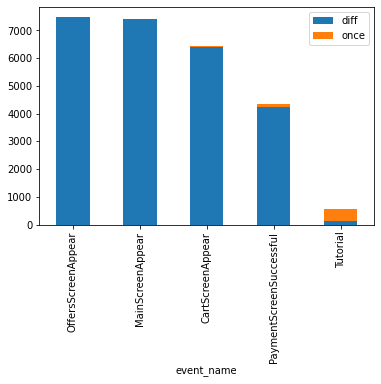

In [ ]:
merge_df[['diff', 'once']].plot(kind = 'bar', stacked = True)

Hasil dari analisis `User dan Event` :
- Pada event `OffersScreenAppear` terjadi 7468 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `2`
- Pada event `MainScreenAppear` terjadi 7428 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `6`
- Pada event `CartScreenAppear` terjadi 6431 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `43`
- Pada event `PaymentScreenSuccessful` terjadi 4349 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `105`
- Pada event `Tutorial` terjadi 542 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `418`

### Funnel Peristiwa

In [ ]:
all_eve_user['main_cum'] = all_eve_user['MainScreenAppear'].cumsum()
all_eve_user['offer_cum'] = all_eve_user['OffersScreenAppear'].cumsum()
all_eve_user['cart_cum'] = all_eve_user['CartScreenAppear'].cumsum()
all_eve_user['tutorial_cum'] = all_eve_user['Tutorial'].cumsum()
all_eve_user['pay_cum'] = all_eve_user['PaymentScreenSuccessful'].cumsum()
all_eve_user.head()

/tmp/ipykernel_44/2569763450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_eve_user['main_cum'] = all_eve_user['MainScreenAppear'].cumsum()
/tmp/ipykernel_44/2569763450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_eve_user['offer_cum'] = all_eve_user['OffersScreenAppear'].cumsum()
/tmp/ipykernel_44/2569763450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,main_cum,offer_cum,cart_cum,tutorial_cum,pay_cum
device_id_hash,,,,,,,,,,
1025423183050919111,2.0,3.0,9.0,2.0,1.0,3.0,9.0,2.0,1.0,2.0
1052317782824159991,17.0,31.0,40.0,9.0,1.0,34.0,49.0,19.0,2.0,11.0
1064069332576331836,7.0,15.0,20.0,3.0,1.0,49.0,69.0,26.0,3.0,14.0
1113177574547813281,4.0,8.0,8.0,1.0,1.0,57.0,77.0,30.0,4.0,15.0
1158644344098364192,11.0,46.0,28.0,8.0,1.0,103.0,105.0,41.0,5.0,23.0


In [ ]:
funnel_data = all_eve_user[['main_cum', 'offer_cum', 'cart_cum', 'tutorial_cum', 'pay_cum']]
funnel_data['offer_main'] = funnel_data['offer_cum'] / funnel_data['main_cum']-1
funnel_data['cart_offer'] = funnel_data['cart_cum'] / funnel_data['offer_cum']-1
funnel_data['tut_cart'] = funnel_data['tutorial_cum'] / funnel_data['cart_cum']-1
funnel_data['pay_tut'] = funnel_data['pay_cum'] / funnel_data['tutorial_cum']-1
funnel_data.head()

/tmp/ipykernel_44/3832341422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_data['offer_main'] = funnel_data['offer_cum'] / funnel_data['main_cum']-1
/tmp/ipykernel_44/3832341422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_data['cart_offer'] = funnel_data['cart_cum'] / funnel_data['offer_cum']-1
/tmp/ipykernel_44/3832341422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

event_name,main_cum,offer_cum,cart_cum,tutorial_cum,pay_cum,offer_main,cart_offer,tut_cart,pay_tut
device_id_hash,,,,,,,,,
1025423183050919111,3.0,9.0,2.0,1.0,2.0,2.000000,-0.777778,-0.500000,1.000000
1052317782824159991,34.0,49.0,19.0,2.0,11.0,0.441176,-0.612245,-0.894737,4.500000
1064069332576331836,49.0,69.0,26.0,3.0,14.0,0.408163,-0.623188,-0.884615,3.666667
1113177574547813281,57.0,77.0,30.0,4.0,15.0,0.350877,-0.610390,-0.866667,2.750000
1158644344098364192,103.0,105.0,41.0,5.0,23.0,0.019417,-0.609524,-0.878049,3.600000


In [ ]:
funnel = funnel_data[['offer_main', 'cart_offer', 'tut_cart', 'pay_tut']]
funnel.tail()

event_name,offer_main,cart_offer,tut_cart,pay_tut
device_id_hash,,,,
941603036904761274,0.007039,-0.138325,-0.916069,7.065056
943476888243120350,0.004996,-0.137982,-0.915991,7.055659
972102914695797995,0.005532,-0.138334,-0.915914,7.048148
9841258664663090,0.005255,-0.138185,-0.915863,7.036969
98792428456080413,0.005385,-0.138859,-0.915721,7.023985


In [ ]:
temp = [
    ['OffersScreenAppear', all_eve_user['OffersScreenAppear'].sum()],
    ['MainScreenAppear', all_eve_user['MainScreenAppear'].sum()],
    ['CartScreenAppear', all_eve_user['CartScreenAppear'].sum()],
    ['Tutorial', all_eve_user['Tutorial'].sum()],
    ['PaymentScreenSuccessful', all_eve_user['PaymentScreenSuccessful'].sum()]
]
temp_funnel = pd.DataFrame(temp, columns=['event_name', 'sum']).sort_values(by = 'sum', ascending = False)
temp_funnel

,event_name,sum
0,OffersScreenAppear,7468.0
1,MainScreenAppear,7428.0
2,CartScreenAppear,6431.0
4,PaymentScreenSuccessful,4349.0
3,Tutorial,542.0


<BarContainer object of 5 artists>

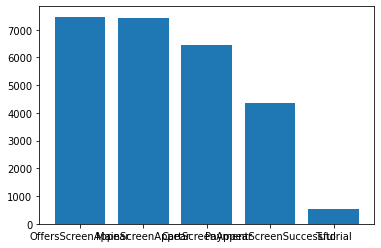

In [ ]:
plt.bar(temp_funnel['event_name'], temp_funnel['sum'])

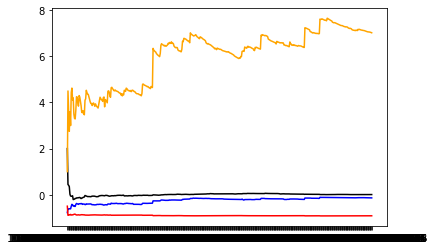

In [ ]:
plt.plot(funnel['offer_main'], c = 'black')
plt.plot(funnel['cart_offer'], c = 'blue')
plt.plot(funnel['tut_cart'], c = 'red')
plt.plot(funnel['pay_tut'], c = 'orange')

In [ ]:
funnel.describe()

event_name,offer_main,cart_offer,tut_cart,pay_tut
count,466.000000,466.000000,466.000000,466.000000
mean,0.007045,-0.245198,-0.904235,6.011909
std,0.107985,0.116629,0.023782,1.203953
min,-0.212435,-0.777778,-0.921142,1.000000
25%,-0.025315,-0.374286,-0.915909,4.643819
50%,0.009919,-0.199047,-0.911650,6.425367
75%,0.034096,-0.160604,-0.890892,6.903407
max,2.000000,-0.114334,-0.500000,7.655172


Berikut urutan dari funnel `MainScreenAppear, OffersScreenAppear, CartScreenAppear, Tutorial, PaymentScreenSuccessful`. Dengan hasil ratio sebagai berikut :
- Ratio dari `MainScreenAppear dan OffersScreenAppear` sebesar `0.005385`.
- Ratio dari `OffersScreenAppear dan CartScreenAppear` sebesar `-0.138859`.
- Ratio dari `CartScreenAppear dan Tutorial` sebesar `-0.915721` yang juga memberikan hasil penurunan user pada tahap ini.
- Ratio dari `Tutorial dan PaymentScreenSuccessful` sebesar `7.023985`.

### Persentase User

In [ ]:
temp_user = [['user_new', all_eve_user['CartScreenAppear'].count()], ['user_all', all_event['MainScreenAppear'].count()], ['user_sub', all_event['MainScreenAppear'].count() - all_eve_user['CartScreenAppear'].count()]]
data_user = pd.DataFrame(temp_user, columns = ['data', 'count'])
data_user

,data,count
0,user_new,466
1,user_all,7419
2,user_sub,6953


In [ ]:
data_pie = data_user[data_user['data'] != 'user_all']
data_pie

,data,count
0,user_new,466
2,user_sub,6953


([<matplotlib.patches.Wedge at 0x7ffa7f66f9d0>,
 [Text(1.0786531464526754, 0.21565572018322077, 'User All Event'),
  Text(-1.0786531262615249, -0.2156558211740156, 'User Not All Event')],
 [Text(0.5883562617014592, 0.1176303928272113, '6%'),
  Text(-0.5883562506881045, -0.1176304479130994, '94%')])

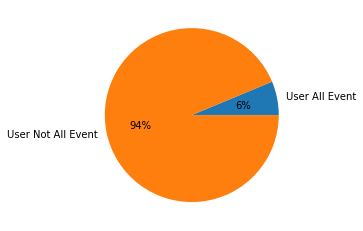

In [ ]:
plt.pie(data_pie['count'], labels = ['User All Event', 'User Not All Event'], autopct='%.0f%%')

Terdapat 2 kategori user dengan keterangan sebagai berikut :
- `94%` atau `6953` users merupakan user yang tidak melakukan semua event.
- `6%` atau `466` users merupakan user yang melakukan semua event.

## Experiment

### User Per Group

In [ ]:
user_count = new_data.groupby('exp_id').agg({
  'device_id_hash' : 'count'
}).reset_index()
user_count

,exp_id,device_id_hash
0,246,79425
1,247,77147
2,248,84726


<BarContainer object of 3 artists>

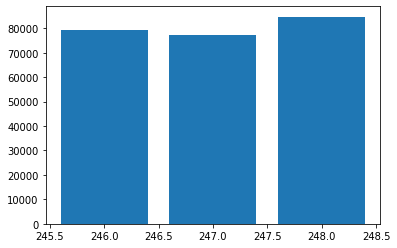

In [ ]:
plt.bar(user_count['exp_id'], user_count['device_id_hash'])

Berikut hasil dari pengelompokan :
- `246` memiliki `79425` user
- `247` memiliki `77147` user
- `248` memiliki `84726` user

### A/A Testing

In [ ]:
ctr_246 = new_data[new_data['exp_id'] == 246]
ctr_246.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2834,OffersScreenAppear,3737462046622621720,2019-08-01 00:10:26,246,2019-08-01


In [ ]:
ctr_247 = new_data[new_data['exp_id'] == 247]
ctr_247.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01
2838,MainScreenAppear,4899590676214355127,2019-08-01 00:11:28,247,2019-08-01
2839,OffersScreenAppear,4899590676214355127,2019-08-01 00:11:30,247,2019-08-01
2843,OffersScreenAppear,4899590676214355127,2019-08-01 00:12:36,247,2019-08-01


In [ ]:
data_246 = ctr_246[['date', 'device_id_hash']]
aa_246 = data_246.groupby('date').agg({
    'device_id_hash' : 'count'
}).reset_index()
aa_246

,date,device_id_hash
0,2019-08-01,11581
1,2019-08-02,10960
2,2019-08-03,10599
3,2019-08-04,11533
4,2019-08-05,12381
5,2019-08-06,11740
6,2019-08-07,10631


In [ ]:
data_247 = ctr_247[['date', 'device_id_hash']]
aa_247 = data_247.groupby('date').agg({
    'device_id_hash' : 'count'
}).reset_index()
aa_247

,date,device_id_hash
0,2019-08-01,12336
1,2019-08-02,11015
2,2019-08-03,11040
3,2019-08-04,9949
4,2019-08-05,10971
5,2019-08-06,11731
6,2019-08-07,10105


In [ ]:
merge_aa = aa_246.merge(aa_247, on = 'date').rename(columns = {
    'device_id_hash_x' : '246',
    'device_id_hash_y' : '247'
})
merge_aa

,date,246,247
0,2019-08-01,11581,12336
1,2019-08-02,10960,11015
2,2019-08-03,10599,11040
3,2019-08-04,11533,9949
4,2019-08-05,12381,10971
5,2019-08-06,11740,11731
6,2019-08-07,10631,10105


<AxesSubplot:>

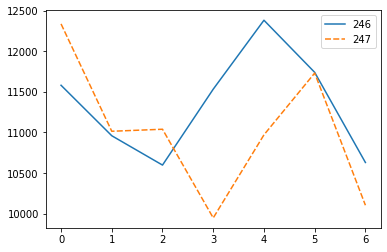

In [ ]:
sns.lineplot(data = merge_aa[['246', '247']])

In [ ]:
merge_aa.describe()

,246,247
count,7.000000,7.000000
mean,11346.428571,11021.000000
std,649.985091,839.092963
min,10599.000000,9949.000000
25%,10795.500000,10538.000000
50%,11533.000000,11015.000000
75%,11660.500000,11385.500000
max,12381.000000,12336.000000


Berikut hasil dari analisis jumlah user dari `246` dan `247` :
- Dengan nilai maksimal sebanyak `12381` dan `12336` users.
- Nilai terendah sebesar `10599` dan`9949` users.
- Dengan rata rata sebesar `11346.42` dan `11021` users.

### Persentasi per event


In [ ]:
ctr_246_event = ctr_246.groupby('event_name').agg({
    'exp_id' : 'count'
}).reset_index()
ctr_246_event

,event_name,exp_id
0,CartScreenAppear,14711
1,MainScreenAppear,37708
2,OffersScreenAppear,14773
3,PaymentScreenSuccessful,11910
4,Tutorial,323


In [ ]:
ctr_246_event['%'] = (ctr_246_event['exp_id']/ctr_246_event['exp_id'].sum())*100
ctr_246_event

,event_name,exp_id,%
0,CartScreenAppear,14711,18.521876
1,MainScreenAppear,37708,47.476235
2,OffersScreenAppear,14773,18.599937
3,PaymentScreenSuccessful,11910,14.995279
4,Tutorial,323,0.406673


In [ ]:
ctr_247_event = ctr_247.groupby('event_name').agg({
    'exp_id' : 'count'
}).reset_index()
ctr_247_event

,event_name,exp_id
0,CartScreenAppear,12456
1,MainScreenAppear,39123
2,OffersScreenAppear,15182
3,PaymentScreenSuccessful,10043
4,Tutorial,343


In [ ]:
ctr_247_event['%'] = (ctr_247_event['exp_id']/ctr_247_event['exp_id'].sum())*100
ctr_247_event

,event_name,exp_id,%
0,CartScreenAppear,12456,16.145800
1,MainScreenAppear,39123,50.712277
2,OffersScreenAppear,15182,19.679314
3,PaymentScreenSuccessful,10043,13.018005
4,Tutorial,343,0.444606


In [ ]:
ctr_event_merge = ctr_246_event.merge(ctr_247_event, on = 'event_name').rename(columns = {
    'exp_id_x' : '246',
    '%_x' : '%_246',
    'exp_id_y' : '247',
    '%_y' : '%_247'
})
ctr_event_merge

,event_name,246,%_246,247,%_247
0,CartScreenAppear,14711,18.521876,12456,16.145800
1,MainScreenAppear,37708,47.476235,39123,50.712277
2,OffersScreenAppear,14773,18.599937,15182,19.679314
3,PaymentScreenSuccessful,11910,14.995279,10043,13.018005
4,Tutorial,323,0.406673,343,0.444606


In [ ]:
barWidth = 0.25
br1 = np.arange(len(ctr_event_merge['event_name']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

<BarContainer object of 5 artists>

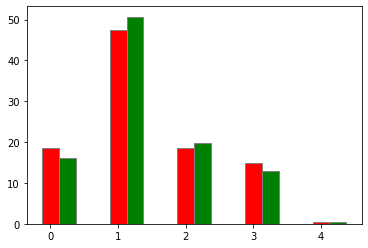

In [ ]:
plt.bar(br1, ctr_event_merge['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2, ctr_event_merge['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')

Berikut perbandingan event per grup `246` dan `247` :
- Pada event `CartScreenAppear` terdapat `18.5%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `16.1%`
- Pada event `MainScreenAppear` terdapat `47.4%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `50.7%`
- Pada event `OffersScreenAppear` terdapat `18.5%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `19.6%`
- Pada event `PaymentScreenSuccessful` terdapat `14.9%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `13%`
- Pada event `Tutorial` terdapat `0.4%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `0.4%`

### Kelompok Trial / 248

In [ ]:
trial = new_data[new_data['exp_id'] == 248]
trial.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
2844,MainScreenAppear,4613461174774205834,2019-08-01 00:14:31,248,2019-08-01
2845,MainScreenAppear,4613461174774205834,2019-08-01 00:14:34,248,2019-08-01
2846,CartScreenAppear,4613461174774205834,2019-08-01 00:14:34,248,2019-08-01
2847,PaymentScreenSuccessful,4613461174774205834,2019-08-01 00:14:43,248,2019-08-01
2848,OffersScreenAppear,4613461174774205834,2019-08-01 00:14:51,248,2019-08-01


In [ ]:
trial_group = trial.groupby('event_name').agg({
    'exp_id' : 'count'
}).reset_index()
trial_group

,event_name,exp_id
0,CartScreenAppear,15198
1,MainScreenAppear,40600
2,OffersScreenAppear,16395
3,PaymentScreenSuccessful,12160
4,Tutorial,373


In [ ]:
trial_group['%'] = (trial_group['exp_id']/trial_group['exp_id'].sum())*100
trial_group

,event_name,exp_id,%
0,CartScreenAppear,15198,17.937823
1,MainScreenAppear,40600,47.919175
2,OffersScreenAppear,16395,19.350613
3,PaymentScreenSuccessful,12160,14.352147
4,Tutorial,373,0.440243


In [ ]:
merged_data = ctr_event_merge.merge(trial_group, on = 'event_name')
merged_data

,event_name,246,%_246,247,%_247,exp_id,%
0,CartScreenAppear,14711,18.521876,12456,16.145800,15198,17.937823
1,MainScreenAppear,37708,47.476235,39123,50.712277,40600,47.919175
2,OffersScreenAppear,14773,18.599937,15182,19.679314,16395,19.350613
3,PaymentScreenSuccessful,11910,14.995279,10043,13.018005,12160,14.352147
4,Tutorial,323,0.406673,343,0.444606,373,0.440243


In [ ]:
cart = merged_data[merged_data['event_name'] == 'CartScreenAppear']
cart

,event_name,246,%_246,247,%_247,exp_id,%
0,CartScreenAppear,14711,18.521876,12456,16.1458,15198,17.937823


In [ ]:
barWidth = 0.25
br1_event = np.arange(len(cart['event_name']))
br2_event = [x + barWidth for x in br1_event]
br3_event = [x + barWidth for x in br2_event]

<BarContainer object of 1 artists>

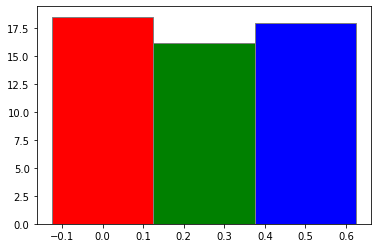

In [ ]:
plt.bar(br1_event, cart['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2_event, cart['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')
plt.bar(br3_event, cart['%'], color ='b', width = barWidth,
        edgecolor ='grey', label ='248')

         event_name    246      %_246    247      %_247  exp_id          %
1  MainScreenAppear  37708  47.476235  39123  50.712277   40600  47.919175


<BarContainer object of 1 artists>

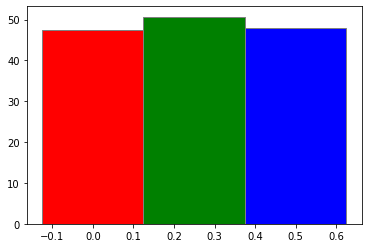

In [ ]:
main = merged_data[merged_data['event_name'] == 'MainScreenAppear']
print(main)
plt.bar(br1_event, main['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2_event, main['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')
plt.bar(br3_event, main['%'], color ='b', width = barWidth,
        edgecolor ='grey', label ='248')

           event_name    246      %_246    247      %_247  exp_id          %
2  OffersScreenAppear  14773  18.599937  15182  19.679314   16395  19.350613


<BarContainer object of 1 artists>

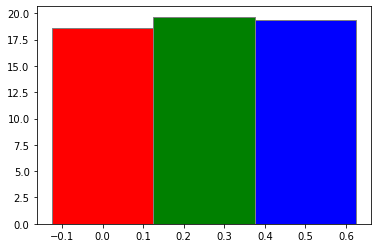

In [ ]:
offer = merged_data[merged_data['event_name'] == 'OffersScreenAppear']
print(offer)
plt.bar(br1_event, offer['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2_event, offer['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')
plt.bar(br3_event, offer['%'], color ='b', width = barWidth,
        edgecolor ='grey', label ='248')

                event_name    246      %_246    247      %_247  exp_id  \
3  PaymentScreenSuccessful  11910  14.995279  10043  13.018005   12160   

           %  
3  14.352147  


<BarContainer object of 1 artists>

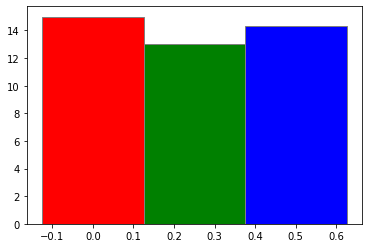

In [ ]:
payment = merged_data[merged_data['event_name'] == 'PaymentScreenSuccessful']
print(payment)
plt.bar(br1_event, payment['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2_event, payment['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')
plt.bar(br3_event, payment['%'], color ='b', width = barWidth,
        edgecolor ='grey', label ='248')

  event_name  246     %_246  247     %_247  exp_id         %
4   Tutorial  323  0.406673  343  0.444606     373  0.440243


<BarContainer object of 1 artists>

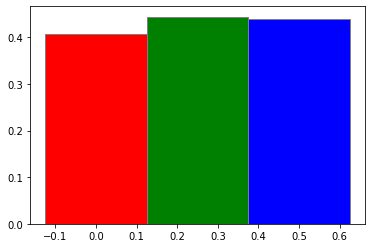

In [ ]:
tutorial = merged_data[merged_data['event_name'] == 'Tutorial']
print(tutorial)
plt.bar(br1_event, tutorial['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2_event, tutorial['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')
plt.bar(br3_event, tutorial['%'], color ='b', width = barWidth,
        edgecolor ='grey', label ='248')

<BarContainer object of 5 artists>

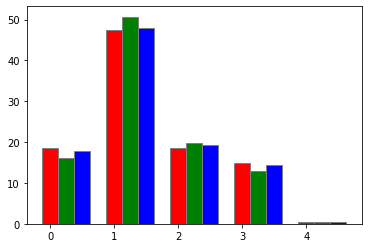

In [ ]:
plt.bar(br1, merged_data['%_246'], color ='r', width = barWidth,
        edgecolor ='grey', label ='246')
plt.bar(br2, merged_data['%_247'], color ='g', width = barWidth,
        edgecolor ='grey', label ='247')
plt.bar(br3, merged_data['%'], color ='b', width = barWidth,
        edgecolor ='grey', label ='248')

In [ ]:
merged_data

,event_name,246,%_246,247,%_247,exp_id,%
0,CartScreenAppear,14711,18.521876,12456,16.145800,15198,17.937823
1,MainScreenAppear,37708,47.476235,39123,50.712277,40600,47.919175
2,OffersScreenAppear,14773,18.599937,15182,19.679314,16395,19.350613
3,PaymentScreenSuccessful,11910,14.995279,10043,13.018005,12160,14.352147
4,Tutorial,323,0.406673,343,0.444606,373,0.440243


Hasil analisis dari ketiga kelompok :
- `CartScreenAppear` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `17.93%`
- `MainScreenAppear` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `47.91%`
- `OffersScreenAppear` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `19.35%`
- `PaymentScreenSuccessful` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `14.35%`
- `Tutorial` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `0.44%`

## Kesimpulan

Presentasi : https://docs.google.com/presentation/d/14o4k4msNfr-gjWNzKmRteb0owm4wPFEncPiXQ17s2xc/edit?usp=sharing

Data di simpan sebagai `data` dengan kolom sebagai berikut :
- event_name
- device_id_hash
- event_timestamp
- exp_id
- date

Terdapat 5 tipe `event_name` dengan hasil sebagai berikut :
- `MainScreenAppear` dengan hasil sebanyak 119205 atau sebesar 48.8%
- `OffersScreenAppear` dengan hasil sebanyak 46825 atau sebesar 19.1%
- `CartScreenAppear` dengan hasil sebanyak 42731 atau sebesar 17.5%
- `PaymentScreenSuccessful` dengan hasil sebanyak 34313 atau sebesar 14%
- `Tutorial` dengan hasil sebanyak 1052 atau sebesar 0.4%

Terdapat `7551` user yang terdaftar pada log.

Dengan nilai event rata rata per user sebesar `32.33`.

Data yang digunakan merupakan data setelah tanggal `2019-08-01` dengan data sebanyak `241298`.

Berikut perbandingan dari data lama dan data baru :
- Penurunan terbanyak terjadi pada `MainScreenAppear` sebesar `-1.48`
- Penurunan terendah terjadi pada `PaymentScreenSuccessful` sebesar `-0.58`
- Rata rata penurunan sebesar `-1.03`

Berikut nilai dari `exp_id` dari user pada data baru :
- `246` dengan hasil sebesar `79425`.
- `247` dengan hasil sebesar `77147`.
- `248` dengan hasil sebesar `84726`.

Berikut hasil dari penelitian mengenai `Frekuensi Event` :
- `MainScreenAppear` dengan interaksi sebanyak `117431`.
- `OffersScreenAppear` dengan interaksi sebanyak `46350`.
- `CartScreenAppear` dengan interaksi sebanyak `42365`.
- `PaymentScreenSuccessful` dengan interaksi sebanyak `34113`.
- `Tutorial` dengan interaksi sebanyak `1039`.

Hasil dari analisis `User dan Event` :
- Pada event `OffersScreenAppear` terjadi 7468 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `2`
- Pada event `MainScreenAppear` terjadi 7428 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `6`
- Pada event `CartScreenAppear` terjadi 6431 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `43`
- Pada event `PaymentScreenSuccessful` terjadi 4349 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `105`
- Pada event `Tutorial` terjadi 542 interaksi dengan keterangan bahwa user dengan 1 kali interaksi sebanyak `418`

Berikut urutan dari funnel `MainScreenAppear, OffersScreenAppear, CartScreenAppear, Tutorial, PaymentScreenSuccessful`. Dengan hasil ratio sebagai berikut :
- Ratio dari `MainScreenAppear dan OffersScreenAppear` sebesar `0.005385`.
- Ratio dari `OffersScreenAppear dan CartScreenAppear` sebesar `-0.138859`.
- Ratio dari `CartScreenAppear dan Tutorial` sebesar `-0.915721` yang juga memberikan hasil penurunan user pada tahap ini.
- Ratio dari `Tutorial dan PaymentScreenSuccessful` sebesar `7.023985`.

Terdapat 2 kategori user dengan keterangan sebagai berikut :
- `94%` atau `6953` users merupakan user yang tidak melakukan semua event.
- `6%` atau `466` users merupakan user yang melakukan semua event.

Berikut hasil dari pengelompokan :
- `246` memiliki `79425` user
- `247` memiliki `77147` user
- `248` memiliki `84726` user

Berikut hasil dari analisis jumlah user dari `246` dan `247` :
- Dengan nilai maksimal sebanyak `12381` dan `12336` users.
- Nilai terendah sebesar `10599` dan`9949` users.
- Dengan rata rata sebesar `11346.42` dan `11021` users.

Berikut perbandingan event per grup `246` dan `247` :
- Pada event `CartScreenAppear` terdapat `18.5%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `16.1%`
- Pada event `MainScreenAppear` terdapat `47.4%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `50.7%`
- Pada event `OffersScreenAppear` terdapat `18.5%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `19.6%`
- Pada event `PaymentScreenSuccessful` terdapat `14.9%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `13%`
- Pada event `Tutorial` terdapat `0.4%` pada kelompok `246` sedangkan pada kelompok `247` terdapat `0.4%`

Hasil analisis dari ketiga kelompok :
- `CartScreenAppear` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `17.93%`
- `MainScreenAppear` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `47.91%`
- `OffersScreenAppear` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `19.35%`
- `PaymentScreenSuccessful` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `14.35%`
- `Tutorial` hasil dari data `248` berada pada kisaran dari data `246` dan `247` dengan hasil sebesar `0.44%`